# Kernel Support Vector Machine in Python
A social network stores user data including their age and estimated salary. It has ads running on its platforms.It collects data such as the user clicks on advertisements and purchases made from them. Given an ad for a car company, it would predict if the user would purchase the car based on his/her age and estimated salary.

In [ ]:
#  dataset can be download from   https://github.com/sharmaroshan/Social-Networks-Ads
#  Explanation in    https://www.mltut.com/svm-implementation-in-python-from-scratch/#how-svm-works


In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [251]:
#Importing the datasets
dataset=pd.read_csv('C:\\Users\\MCA\\Desktop\\ANUJA B\\SVM\\Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [252]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [253]:
#Split Dataset into X and Y
x=dataset.iloc[:,[2, 3]].values
y=dataset.iloc[:,4].values



In [254]:
# x

In [255]:
# y

### Radial Basis Function kernel (non - linear)

In [256]:
#splitting the data set in training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [257]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

#### Implementing SVM

In [258]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


In [261]:
#fitting classifier in the training set

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)


SVC(random_state=0)

In [262]:
#predicting the results
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [263]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

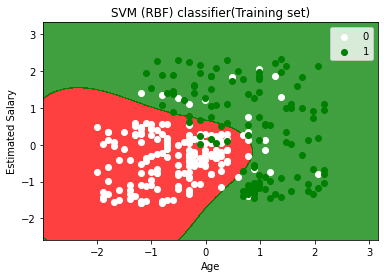

In [267]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('white','green'))(i),label=j)
    
                             
plt.title('SVM (RBF) classifier(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


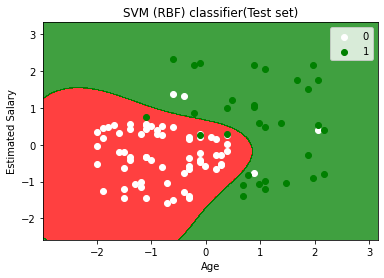

In [266]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('white','green'))(i),label=j)
    
                             
plt.title('SVM (RBF) classifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<!-- #### Implementing SVM -->

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()

In [ ]:
# x_train1 = sc.fit_transform(X_train)
# x_test1 = sc.transform(X_test

#### ------------------------------------------------------------------------------SVM Linear Kernel----------------------------------------------------------------

# SVM Linear Kernel

In [268]:
#Split Dataset into x and Y
xl=dataset.iloc[:, [2,3]].values
yl=dataset.iloc[:, 4].values

### Linear Kernel 

In [269]:
# Spliting X and y into Training and testing data
from sklearn.model_selection import train_test_split

In [270]:
x_trainl, x_testl, y_trainl, y_testl = train_test_split(xl, yl, test_size=0.3)

In [271]:
y_testl

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [272]:
from sklearn.preprocessing import StandardScaler

In [273]:
sc = StandardScaler()

In [274]:
x_trainl = sc.fit_transform(x_trainl)
x_testl = sc.transform(x_testl)

### Implementing SVM

In [275]:
from sklearn.svm import SVC

In [276]:
classifier1 = SVC(kernel='linear')

In [277]:
classifier1.fit(x_trainl, y_trainl)

SVC(kernel='linear')

In [278]:
# precting :
y_predictor = classifier1.predict(x_testl)
y_predictor

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [279]:
# Confusion Matrix to check false pasitives :
from sklearn.metrics import confusion_matrix

In [280]:
errorsl = confusion_matrix(y_testl, y_predictor)
errorsl

array([[70,  3],
       [20, 27]], dtype=int64)

In [281]:
accuracy_score(y_testl,y_predictor)

0.8083333333333333

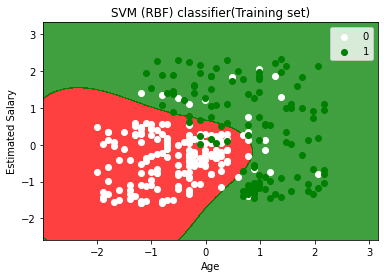

In [282]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_setl,y_setl=x_trainl,y_trainl
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('white','green'))(i),label=j)
    
                             
plt.title('SVM (linear) classifier(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


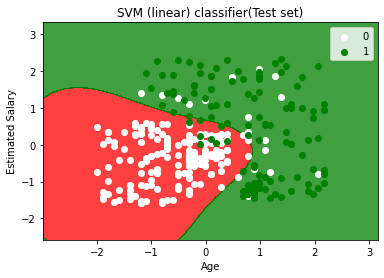

In [284]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_setl,y_setl=x_testl,y_testl
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1],
                c=ListedColormap(('white','green'))(i),label=j)
    
                             
plt.title('SVM (linear) classifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()